C:\Users\Student\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: float() argument must be a string or a number, not 'Barrier'

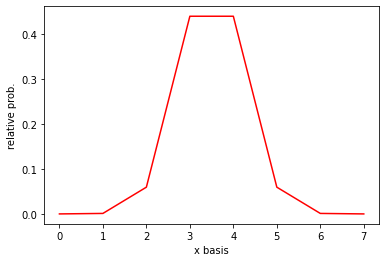

In [20]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister, QuantumRegister
import matplotlib.pyplot as plt
def sim_sv(qc,text):
    """Get the statevecor of the output of the circuit qc"""
    #import libs
    from qiskit_textbook.tools import vector2latex
    from qiskit import Aer, execute
    from qiskit.quantum_info import Statevector
    #code
    sv_sim = Aer.get_backend('statevector_simulator')
    sv = execute (qc, sv_sim).result().get_statevector()
    #vector2latex(sv, pretext = "|"+ text + "\\rangle =")
    return sv
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    for i in range (n):
        circuit.h(i)
        m = 1
        for j in range (i+1,n):
            m = m +1; 
            circuit.cu1(-2*pi/2**(m), i, j)
            
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit
def makeQFTgate(N):
    """returns a gate of centred QFT, swaps qubits"""
    temp = QuantumCircuit (N)
    swap_registers(temp, N)
    qft_rotations(temp,N)
    #temp.x(n-1);
    QFTC = temp.to_gate()
    QFTC.name = "QFT_" + str(N) 
    return QFTC
def phase(n, phi):
    """returns the phase transformation gate for n qubits"""
    qc = QuantumCircuit(n+1);
    for i in range (n):
        qc.u1(phi/(2**(i+n-3)), n-1-i)
    for i in range (n):
        for j in range (i+1,n):
            qc.cx(n-1-j, n)
            qc.cx(n-1-i, n)
            qc.u1(phi* (2**(2-i-j)), n) #2-i-j or 4?
            qc.cx(n-1-i, n)
            qc.cx(n-1-j, n)
    phcirc = qc.to_gate()
    phcirc.name = 'phase'+str(phi)
    return phcirc
def evolve (n,phi,initial_state, stepsnumber):
    ## make the circuit
    n1 = n+1
    snaps = []
    #qubits
    for i in range (stepsnumber):
        q = QuantumRegister(n1)
        qc = QuantumCircuit(q)
        qc.barrier();
        #initialization
        magnitude = np.linalg.norm(initial_state)
        initial_state =initial_state/magnitude
        qc.initialize(initial_state, list(range(n))) 
        qc.barrier();
        #QFT
        QFT = makeQFTgate(n)
        qc.append(QFT,range(n))
        qc.barrier();
        #phase
        ph = phase (n,(i+1)*phi)
        qc.append(ph,range(n+1))
        qc.barrier();
        #inverse QFT
        QFTi = QFT.inverse()
        QFTi.name = "QFTi_" + str(n)
        qc.append(QFTi,list(range(n)))
        qc.barrier()
        #another phase for the harmonic potential
        #qc.append(ph,range(n+1))
        #qc.barrier();
        
        finalstate = sim_sv(qc,'\psi')
        prob = np.square(abs(finalstate))
        snaps.append(prob)
    #return snaps
    return qc
def action ():
    snaps = evolve(n,phi,initial_state, stepsnumber)
    plt.plot(np.square(abs(initial_state)),'r')
    leg = ["initial"]
    plt.xlabel("x basis")
    plt.ylabel("relative prob.")    
    for i in range (stepsnumber):
        plt.plot(snaps[i])
        leg. append ("step_"+str(i+1))
    x=plt.axis([0, 2**n-1, 0, 1.1*max(np.square(abs(initial_state)))])
    plt.legend(leg)
    return snaps
##parameters
n = 3; ## number of qubits
phi = 0.25*pi; ##time of evolution 
#initial_state = np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2**n/3) +0.5)**2/(2*15**2)))+np.sqrt(np.exp(-(np.linspace(0,2**n-1, 2**n) - (2*2**n/3) +0.5)**2/(2*15**2)))
width= 2**n/8;
k=1; # k momentum; 
initial_state = (np.exp(-(np.linspace(0,2**n-1, 2**n) - (2**n/2) +0.5)**2/(2*width**2)))*(np.exp(-k*1j*(np.linspace(0,2**n-1, 2**n) - (2**n/2) +0.5)))# n Centred Gaussian

#initial_state = [0,1,1,0] # n=2 Pi function
#initial_state = [0,0,1,1,1,1,0,0] #n=3 Pi function
#initial_state = [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0] #n=4 Pi function

##general energy state 
#w=0 #harmonic
#mom = np.zeros(2**n);
#mom[w]=1
#mom [2**n-w]=1
#initial_state= np.fft.fft(mom,2**n)
magnitude = np.linalg.norm(initial_state)
initial_state =initial_state/magnitude


stepsnumber = 1; 
action();

# try removing and putting x, swaps, inv F in place of F, and so on in the harmonic potential. 

In [13]:
from matplotlib.animation import FuncAnimation

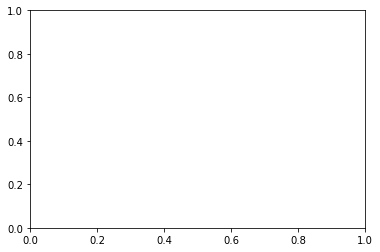

In [14]:
x_data = []
y_data = []

fig, ax = plt.subplots()

def animation_frame(i):
	y_data=snaps[i]
	x=plt.axis([0, 2**n-1, 0, 1.1*max(np.square(abs(initial_state)))])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
    
	return line, 

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 0, 1), interval=10)
plt.show()

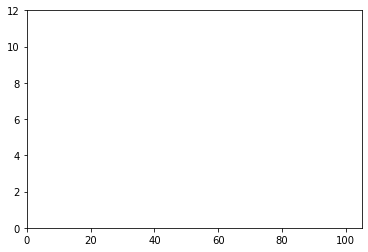

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0, 105)
ax.set_ylim(0, 12)
line, = ax.plot(0, 0)

def animation_frame(i):
	x_data.append(i * 10)
	y_data.append(i)

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line, 

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 10, 0.1), interval=10)
plt.show()



In [21]:
qc = evolve(n,phi,initial_state, stepsnumber)

In [22]:
qc.draw()


░ »
q56_0: ─░─»
        ░ »
q56_1: ─░─»
        ░ »
q56_2: ─░─»
        ░ »
q56_3: ─░─»
        ░ »
«       ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q56_0: ┤0                                                                                                                                                                       ├»
«       │                                                                                                                                                                        │»
«q56_1: ┤1 initialize(-0.0015388-0.00057639j,-0.026441+0.019752j,0.01725+0.24326j,0.58175+0.31781j,0.58175-0.31781j,0.01725-0.24326j,-0.026441-0.019752j,-0.0015388+0.00057639j) ├»
«       │                                                                                                                                                                        │»
«q56_2: ┤2                                                                                                                                                                       ├»
«       └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«q56_3: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                                                                                                                                                 »
«        ░ ┌────────┐ ░ ┌──────────────────────────┐ ░ ┌─────────┐ ░ 
«q56_0: ─░─┤0       ├─░─┤0                         ├─░─┤0        ├─░─
«        ░ │        │ ░ │                          │ ░ │         │ ░ 
«q56_1: ─░─┤1 QFT_3 ├─░─┤1                         ├─░─┤1 QFTi_3 ├─░─
«        ░ │        │ ░ │  phase0.7853981633974483 │ ░ │         │ ░ 
«q56_2: ─░─┤2       ├─░─┤2                         ├─░─┤2        ├─░─
«        ░ └────────┘ ░ │                          │ ░ └─────────┘ ░ 
«q56_3: ─░────────────░─┤3                         ├─░─────────────░─
«        ░            ░ └──────────────────────────┘ ░             ░

In [23]:
qc.measure_all()

In [24]:
qc.decompose().draw()

░      ┌──────────────────┐ ░    ┌───┐                               »
 q56_0: ─░──|0>─┤0                 ├─░──X─┤ H ├─■──────■──────────────────────»
         ░      │                  │ ░  │ └───┘ │-π/2  │     ┌───┐            »
 q56_1: ─░──|0>─┤1 disentangler_dg ├─░──┼───────■──────┼─────┤ H ├─■──────────»
         ░      │                  │ ░  │              │-π/4 └───┘ │-π/2 ┌───┐»
 q56_2: ─░──|0>─┤2                 ├─░──X──────────────■───────────■─────┤ H ├»
         ░      └──────────────────┘ ░                                   └───┘»
 q56_3: ─░───────────────────────────░────────────────────────────────────────»
         ░                           ░                                        »
meas: 4/══════════════════════════════════════════════════════════════════════»
                                                                              »
«         ░ ┌──────────┐                                                    »
« q56_0: ─░─┤ U1(π/16) ├─────────────────────────────────■──────────────────»
«         ░ ├─────────┬┘                                 │                  »
« q56_1: ─░─┤ U1(π/8) ├───■─────────────────────────■────┼──────────────────»
«         ░ ├─────────┤   │                         │    │                  »
« q56_2: ─░─┤ U1(π/4) ├───┼────■───────────────■────┼────┼────■─────────────»
«         ░ └─────────┘ ┌─┴─┐┌─┴─┐┌─────────┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─────────┐»
« q56_3: ─░─────────────┤ X ├┤ X ├┤ U1(π/2) ├┤ X ├┤ X ├┤ X ├┤ X ├┤ U1(π/4) ├»
«         ░             └───┘└───┘└─────────┘└───┘└───┘└───┘└───┘└─────────┘»
«meas: 4/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                  ░                       »
« q56_0: ───────■────■─────────────────────────■───░─────────────■─────────»
«               │    │                         │   ░             │    ┌───┐»
« q56_1: ───────┼────┼────■───────────────■────┼───░───────■─────┼────┤ H ├»
«               │    │    │               │    │   ░ ┌───┐ │π/2  │π/4 └───┘»
« q56_2: ──■────┼────┼────┼───────────────┼────┼───░─┤ H ├─■─────■─────────»
«        ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─────────┐┌─┴─┐┌─┴─┐ ░ └───┘                 »
« q56_3: ┤ X ├┤ X ├┤ X ├┤ X ├┤ U1(π/8) ├┤ X ├┤ X ├─░───────────────────────»
«        └───┘└───┘└───┘└───┘└─────────┘└───┘└───┘ ░                       »
«meas: 4/══════════════════════════════════════════════════════════════════»
«                                                                          »
«              ┌───┐    ░  ░ ┌─┐         
« q56_0: ─■────┤ H ├─X──░──░─┤M├─────────
«         │π/2 └───┘ │  ░  ░ └╥┘┌─┐      
« q56_1: ─■──────────┼──░──░──╫─┤M├──────
«                    │  ░  ░  ║ └╥┘┌─┐   
« q56_2: ────────────X──░──░──╫──╫─┤M├───
«                       ░  ░  ║  ║ └╥┘┌─┐
« q56_3: ───────────────░──░──╫──╫──╫─┤M├
«                       ░  ░  ║  ║  ║ └╥┘
«meas: 4/═════════════════════╩══╩══╩══╩═
«                             0  1  2  3

In [30]:
def sim_real(qc):
    """simulate the circuit qc on a real device and return the prob dist"""
    from qiskit import IBMQ
    IBMQ.save_account('903ffcbecbe4edc379d77d44f37be4041be547c171a65040d2f54e4c6fdc2386b8d23b52010d86e9fd691d0e2e025d60fd1809f617eb6c13c911c139b6956f9c')
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    provider.backends()
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)
    from qiskit.tools.monitor import job_monitor

    shots = 1024
    job = execute(qc, backend=backend, shots=shots)

    job_monitor(job, interval = 2)
    results = job.result()
    answer = results.get_counts(qc)
    print(answer)
    plot_histogram(answer)
    return answer

In [31]:
sim_real(qc)

configrc.store_credentials:WARNING:2021-01-23 03:08:09,360: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-01-23 03:08:10,094: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_athens
Job Status: job has successfully run
{'0000': 96, '0001': 116, '0010': 105, '0011': 143, '0100': 144, '0101': 88, '0110': 77, '0111': 61, '1000': 23, '1001': 23, '1010': 26, '1011': 18, '1100': 47, '1101': 25, '1110': 14, '1111': 18}


{'0000': 96,
 '0001': 116,
 '0010': 105,
 '0011': 143,
 '0100': 144,
 '0101': 88,
 '0110': 77,
 '0111': 61,
 '1000': 23,
 '1001': 23,
 '1010': 26,
 '1011': 18,
 '1100': 47,
 '1101': 25,
 '1110': 14,
 '1111': 18}

In [27]:
from qiskit.providers.ibmq import least_busy

In [28]:
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute

In [29]:
#import visualization
from qiskit.visualization import plot_histogram

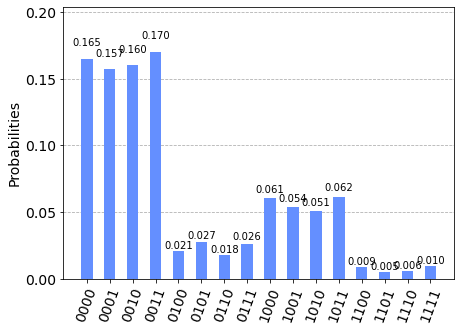

In [38]:
 plot_histogram({'0000': 169,
 '0001': 161,
 '0010': 164,
 '0011': 174,
 '0100': 21,
 '0101': 28,
 '0110': 18,
 '0111': 27,
 '1000': 62,
 '1001': 55,
 '1010': 52,
 '1011': 63,
 '1100': 9,
 '1101': 5,
 '1110': 6,
 '1111': 10})

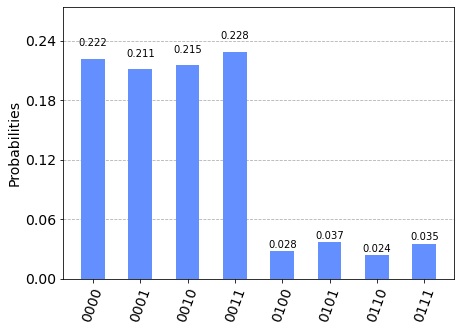

In [4]:
 plot_histogram({'0000': 169,
 '0001': 161,
 '0010': 164,
 '0011': 174,
 '0100': 21,
 '0101': 28,
 '0110': 18,
 '0111': 27})

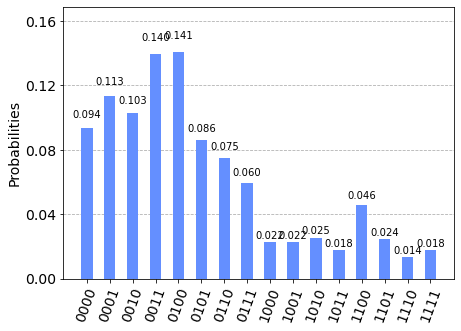

In [32]:
 plot_histogram({'0000': 96,
 '0001': 116,
 '0010': 105,
 '0011': 143,
 '0100': 144,
 '0101': 88,
 '0110': 77,
 '0111': 61,
 '1000': 23,
 '1001': 23,
 '1010': 26,
 '1011': 18,
 '1100': 47,
 '1101': 25,
 '1110': 14,
 '1111': 18})